In [26]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [4]:
# Static file paths.
GROUND_TRUTH_PATH = '../../data/duo-student-finance/cases.json'
RESULTS_PATH = '../../results/duo-student-finance/'

In [5]:
# Specific results files.
result_files = [
    'deepseek-r1:8b-0.8-no-20250129110014.json',
    'llama3.2-0.8-no-20250129091911.json',
    'qwen2.5:1.5b-0.8-no-20250129094820.json',
    'deepseek-r1:8b-0.8-yes-20250129105858.json',
    'llama3.2-0.8-yes-20250129085941.json',
    'qwen2.5:1.5b-0.8-yes-20250129093907.json'
]

In [6]:
# Load ground truth data.
with open(GROUND_TRUTH_PATH, 'r') as f:
    ground_truth_data = json.load(f)

df_truth = pd.DataFrame(ground_truth_data)

In [7]:
# Load results from each file.
df_results = {}

for file in result_files:
    result_path = os.path.join(RESULTS_PATH, file)
    with open(result_path, 'r') as f:
        result_data = json.load(f)
    df_result = pd.DataFrame(result_data)
    # Pre-process the prediction field.
    if 'prediction' in df_result.columns:
        df_result['prediction'] = df_result['prediction'].replace('Not Eligible', 'NotEligible')
    # Merge the current results with the ground truth data.
    df_merged = df_truth.merge(df_result, left_on='id', right_on='case_id', how='inner')
    # Update the results dictionary.
    model_key = file.rsplit('-', 1)[0]
    model_key = model_key.replace('.json', '')
    df_results[model_key] = df_merged

In [18]:
# MODEL SETUP: Qwen-2.5, params: 1.5B, temperature: 0.8, decision_tree: no.
df_qwen_no = df_results['qwen2.5:1.5b-0.8-no']
correct_predictions = (df_qwen_no['decision'] == df_qwen_no['prediction']).sum()
total_cases = len(df_qwen_no)

# ACCURACY RATIO: correct predictions / total cases.
accuracy = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['qwen2.5:1.5b-0.8-no']['accuracy'] = accuracy
print(f'Accuracy Ratio for Qwen-2.5 (no decision tree): {accuracy:.2f}')

Accuracy Ratio for Qwen-2.5 (no decision tree): 0.57


In [19]:
# MODEL SETUP: Qwen-2.5, params: 1.5B, temperature: 0.8, decision_tree: yes.
df_qwen_yes = df_results['qwen2.5:1.5b-0.8-yes']
correct_predictions = (df_qwen_yes['decision'] == df_qwen_yes['prediction']).sum()
total_cases = len(df_qwen_yes)

# ACCURACY RATIO: correct predictions / total cases.
accuracy_ratio_qwen_yes = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['qwen2.5:1.5b-0.8-yes']['accuracy'] = accuracy_ratio_qwen_yes
print(f'Accuracy Ratio for Qwen-2.5 (with decision tree): {accuracy_ratio_qwen_yes:.2f}')

Accuracy Ratio for Qwen-2.5 (with decision tree): 0.51


In [20]:
# MODEL SETUP: LLaMa-3.2, params: 3.2B, temperature: 0.8, decision_tree: no.
df_llama_no = df_results['llama3.2-0.8-no']
correct_predictions = (df_llama_no['decision'] == df_llama_no['prediction']).sum()
total_cases = len(df_llama_no)

# ACCURACY RATIO: correct predictions / total cases.
accuracy_ratio_llama_no = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['llama3.2-0.8-no']['accuracy'] = accuracy_ratio_llama_no
print(f'Accuracy Ratio for LLaMa-3.2 (no decision tree): {accuracy_ratio_llama_no:.2f}')

Accuracy Ratio for LLaMa-3.2 (no decision tree): 0.56


In [21]:
# MODEL SETUP: LLaMa-3.2, params: 3.2B, temperature: 0.8, decision_tree: yes.
df_llama_yes = df_results['llama3.2-0.8-yes']
correct_predictions = (df_llama_yes['decision'] == df_llama_yes['prediction']).sum()
total_cases = len(df_llama_yes)

# ACCURACY RATIO: correct predictions / total cases.
accuracy_ratio_llama_yes = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['llama3.2-0.8-yes']['accuracy'] = accuracy_ratio_llama_yes
print(f'Accuracy Ratio for LLaMa-3.2 (with decision tree): {accuracy_ratio_llama_yes:.2f}')

Accuracy Ratio for LLaMa-3.2 (with decision tree): 0.59


In [22]:
# MODEL SETUP: DeepSeek-R1, params: 8B, temperature: 0.8, decision_tree: no.
df_deepseek_no = df_results['deepseek-r1:8b-0.8-no']
correct_predictions = (df_deepseek_no['decision'] == df_deepseek_no['prediction']).sum()
total_cases = len(df_deepseek_no)

# ACCURACY RATIO: correct predictions / total cases.
accuracy_ratio_deepseek_no = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['deepseek-r1:8b-0.8-no']['accuracy'] = accuracy_ratio_deepseek_no
print(f'Accuracy Ratio for DeepSeek-R1 (no decision tree): {accuracy_ratio_deepseek_no:.2f}')

Accuracy Ratio for DeepSeek-R1 (no decision tree): 0.68


In [23]:
# MODEL SETUP: DeepSeek-R1, params: 8B, temperature: 0.8, decision_tree: yes.
df_deepseek_yes = df_results['deepseek-r1:8b-0.8-yes']
correct_predictions = (df_deepseek_yes['decision'] == df_deepseek_yes['prediction']).sum()
total_cases = len(df_deepseek_yes)

# ACCURACY RATIO: correct predictions / total cases.
accuracy_ratio_deepseek_yes = correct_predictions / total_cases if total_cases > 0 else 0.0
df_results['deepseek-r1:8b-0.8-yes']['accuracy'] = accuracy_ratio_deepseek_yes
print(f'Accuracy Ratio for DeepSeek-R1 (with decision tree): {accuracy_ratio_deepseek_yes:.2f}')

Accuracy Ratio for DeepSeek-R1 (with decision tree): 0.87


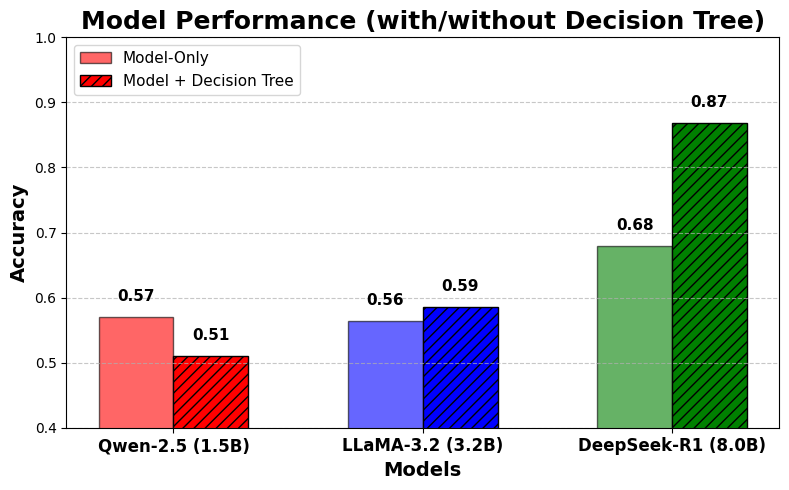

In [34]:
# PERFORMANCE PLOT
SAVE_PATH = '../../resources/plots/model_performance.png'

# Load the model data.
models = ['Qwen-2.5 (1.5B)', 'LLaMA-3.2 (3.2B)', 'DeepSeek-R1 (8.0B)']
accuracy_model_only = [
    df_results['qwen2.5:1.5b-0.8-no']['accuracy'][0], 
    df_results['llama3.2-0.8-no']['accuracy'][0], 
    df_results['deepseek-r1:8b-0.8-no']['accuracy'][0]
]
accuracy_model_tree = [
    df_results['qwen2.5:1.5b-0.8-yes']['accuracy'][0], 
    df_results['llama3.2-0.8-yes']['accuracy'][0], 
    df_results['deepseek-r1:8b-0.8-yes']['accuracy'][0]
]

# Setup bars.
x = np.arange(len(models))
width = 0.3
# Colors: Qwen (red), LLaMA (blue), DeepSeek (green).
colors = ['red', 'blue', 'green']
# Create the plot.
fig, ax = plt.subplots(figsize=(8, 5))
# Adjust effects for the bars.
bars1 = ax.bar(
    x - width/2,
    accuracy_model_only,
    width,
    color=colors,
    alpha=0.6,
    label='Model-Only',
    edgecolor='black',
    hatch=''
)
bars2 = ax.bar(
    x + width/2,
    accuracy_model_tree,
    width,
    color=colors,
    alpha=1.0,
    label='Model + Decision Tree',
    edgecolor='black',
    hatch='///'
)
# Label bars.
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.02,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold'
        )
# Label axes.
ax.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_title('Model Performance (with/without Decision Tree)', fontsize=18, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12, fontweight='bold')
# Legend.
ax.legend(fontsize=11, loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.7)
# Render the plot and save itsc copy.
plt.ylim(0.4, 1.0)
plt.tight_layout()
plt.savefig(SAVE_PATH, dpi=300)
plt.show()